### Import librarys and tools
### import Datasets


In [6]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
url="https://covid-tracker-us.herokuapp.com/confirmed"
url1="https://covid-tracker-us.herokuapp.com/deaths"
urlrecuperados="https://covid-tracker-us.herokuapp.com/recovered"

res=requests.get(url)
j = res.json()
res1=requests.get(url1)
jdead=res1.json()
resrec=requests.get(urlrecuperados)
jrecuperados = resrec.json()


###  Preparing the data set. (confirmed, recovered, dead)

In [7]:

#confirmed
paises=[]
for i in range(0,len(j["locations"])):
    paises.append(j["locations"][i]["country"])

historial=(j["locations"][0]["history"])
df = pd.DataFrame([[key, historial[key]] for key in historial.keys()], columns=['date', 'Afghanistan'])
df=df.set_index("date")
#deaths
paisesdead=[]
for i in range(0,len(jdead["locations"])):
    paisesdead.append(jdead["locations"][i]["country"])

historialdead=(jdead["locations"][0]["history"])
dfd = pd.DataFrame([[key, historialdead[key]] for key in historialdead.keys()], columns=['date', 'Afghanistan'])
dfd=dfd.set_index("date")
#recovered

historiale1=(j["locations"][1]["history"])
europarecupe = pd.DataFrame([[key, historiale1[key]] for key in historiale1.keys()], columns=['date', 'Albania'])
europarecupe=europarecupe.set_index("date")




### Tag of countrys for dataframes for the global dataframe

In [8]:

#confirms
for i in range(0,len(paises)):
    
    if paises[i] in paises[:i]:
        paises[i]='{}{}'.format(paises[i], m)
        m+=1
    else:
        m=0
        
for i in range(1,len(paises)):
    df[paises[i]]=[j["locations"][i]["history"][k] for k in j["locations"][i]["history"]]
df.astype("float")

paisesduplicados={"Australia":6,"Canada":12,"China":31,"France":9,"Netherlands":3,"United Kingdom":9}
for k,l in paisesduplicados.items():   
    for m in range(0,l+1):    
        df["{}".format(k)]+=df["{}{}".format(k,m)]
        df.drop(columns=["{}{}".format(k,m)],inplace=True)
df


        
#d
for i in range(0,len(paisesdead)):
    
    if paisesdead[i] in paisesdead[:i]:
        paisesdead[i]='{}{}'.format(paisesdead[i], m)
        m+=1
    else:
        m=0


for i in range(1,len(paisesdead)):
    dfd[paisesdead[i]]=[jdead["locations"][i]["history"][k] for k in jdead["locations"][i]["history"]]
dfd.astype("float")

paisesduplicados={"Australia":6,"Canada":12,"China":31,"France":9,"Netherlands":3,"United Kingdom":9}
for k,l in paisesduplicados.items():   
    for m in range(0,l+1):    
        dfd["{}".format(k)]+=dfd["{}{}".format(k,m)]
        dfd.drop(columns=["{}{}".format(k,m)],inplace=True)



## I will classify the data for every continent. Using latitude y Longitude of any country i will separated. And analize the timeline and the last two week of each continent

In [9]:

historiale1=[]
coordenadas=[]
paises=[]

historiale1=(j["locations"][1]["history"])
asia = pd.DataFrame([[key, historiale1[key]] for key in historiale1.keys()], columns=['date', 'China'])
asia=asia.set_index("date")

ce=[5.81,73,56.27,156]
for i in range(0,len(j["locations"])):
    if (float(j["locations"][i]["coordinates"]["lat"])>ce[0]) & (float(j["locations"][i]["coordinates"]["lat"])<ce[1]) &(float(j["locations"][i]["coordinates"]["long"])>ce[2]) & (float(j["locations"][i]["coordinates"]["long"])<ce[3]):
        coordenadas.append(j["locations"][i]["coordinates"])
        paises.append(j["locations"][i]["country"])
        asia[j["locations"][i]["country"]]=[j["locations"][i]["history"][k] for k in j["locations"][i]["history"]]
asia.tail()

historiale1=[]
coordenadas=[]
paises=[]

historiale1=(j["locations"][1]["history"])
america = pd.DataFrame([[key, historiale1[key]] for key in historiale1.keys()], columns=['date', 'Argentina'])
america=america.set_index("date")

ce=[-56,70,-134,-31]
for i in range(0,len(j["locations"])):
    if (float(j["locations"][i]["coordinates"]["lat"])>ce[0]) & (float(j["locations"][i]["coordinates"]["lat"])<ce[1]) &(float(j["locations"][i]["coordinates"]["long"])>ce[2]) & (float(j["locations"][i]["coordinates"]["long"])<ce[3]):
        coordenadas.append(j["locations"][i]["coordinates"])
        paises.append(j["locations"][i]["country"])
        america[j["locations"][i]["country"]]=[j["locations"][i]["history"][k] for k in j["locations"][i]["history"]]


historiale1=[]
coordenadas=[]
paises=[]

historiale1=(j["locations"][1]["history"])
africa = pd.DataFrame([[key, historiale1[key]] for key in historiale1.keys()], columns=['date', 'Angola'])
africa=africa.set_index("date")

ce=[-40,35,-21,56]
for i in range(0,len(j["locations"])):
    if (float(j["locations"][i]["coordinates"]["lat"])>ce[0]) & (float(j["locations"][i]["coordinates"]["lat"])<ce[1]) &(float(j["locations"][i]["coordinates"]["long"])>ce[2]) & (float(j["locations"][i]["coordinates"]["long"])<ce[3]):
        coordenadas.append(j["locations"][i]["coordinates"])
        paises.append(j["locations"][i]["country"])
        africa[j["locations"][i]["country"]]=[j["locations"][i]["history"][k] for k in j["locations"][i]["history"]]
africa.tail()

historiale1=[]
coordenadas=[]
paises=[]

historiale1=(j["locations"][1]["history"])
oceania = pd.DataFrame([[key, historiale1[key]] for key in historiale1.keys()], columns=['date', 'Australia'])
oceania=oceania.set_index("date")

ce=[-58.8,5.81,87,156]
for i in range(0,len(j["locations"])):
    if (float(j["locations"][i]["coordinates"]["lat"])>ce[0]) & (float(j["locations"][i]["coordinates"]["lat"])<ce[1]) &(float(j["locations"][i]["coordinates"]["long"])>ce[2]) & (float(j["locations"][i]["coordinates"]["long"])<ce[3]):
        coordenadas.append(j["locations"][i]["coordinates"])
        paises.append(j["locations"][i]["country"])
        oceania[j["locations"][i]["country"]]=[j["locations"][i]["history"][k] for k in j["locations"][i]["history"]]
oceania.tail()

historiale1=[]
coordenadas=[]
paiseuropeos=[]

historiale1=(j["locations"][1]["history"])
europa = pd.DataFrame([[key, historiale1[key]] for key in historiale1.keys()], columns=['date', 'Albania'])
europa=europa.set_index("date")

ce=[36.662262,71.382695,-28.442636,26.401114]
for i in range(0,len(j["locations"])):
    if (float(j["locations"][i]["coordinates"]["lat"])>ce[0]) & (float(j["locations"][i]["coordinates"]["lat"])<ce[1]) &(float(j["locations"][i]["coordinates"]["long"])>ce[2]) & (float(j["locations"][i]["coordinates"]["long"])<ce[3]):
        coordenadas.append(j["locations"][i]["coordinates"])
        paiseuropeos.append(j["locations"][i]["country"])
        europa[j["locations"][i]["country"]]=[j["locations"][i]["history"][k] for k in j["locations"][i]["history"]]
europa.tail()

asi, ocea, afr, ame ,eur=[],[],[],[],[] 
for i in range(len(oceania)):
    ocea.append(oceania.iloc[i].sum())
    asi.append(asia.iloc[i].sum())
    ame.append(america.iloc[i].sum())
    afr.append(africa.iloc[i].sum())
    eur.append(europa.iloc[i].sum())
total=pd.DataFrame()    
oceania["Total"]=pd.DataFrame({"Total":ocea,"date":[key for key in historiale1.keys()]}).set_index("date")
america["Total"]=pd.DataFrame({"Total":asi,"date":[key for key in historiale1.keys()]}).set_index("date")
asia["Total"]=pd.DataFrame({"Total":ame,"date":[key for key in historiale1.keys()]}).set_index("date")
africa["Total"]=pd.DataFrame({"Total":afr,"date":[key for key in historiale1.keys()]}).set_index("date")
europa["Total"]=pd.DataFrame({"Total":eur,"date":[key for key in historiale1.keys()]}).set_index("date")
total=europa["Total"]+oceania["Total"]+america["Total"]+asia["Total"]+africa["Total"]

confirmedcontinent=pd.DataFrame({"date":[key for key in historiale1.keys()],"Asia":asi,"America":ame,"Oceania":ocea,"Africa":afr,"Europa":eur,"Total":total.values})
confirmedcontinent=confirmedcontinent.set_index("date")
confirmedcontinent.columns

newcasesspast2week=[(confirmedcontinent[k][-15]-confirmedcontinent[k][-22]) for k in confirmedcontinent.columns]
newcasesspastweek=[(confirmedcontinent[k][-8]-confirmedcontinent[k][-15]) for k in confirmedcontinent.columns]
newcaseslastweek=[(confirmedcontinent[k][-1]-confirmedcontinent[k][-8]) for k in confirmedcontinent.columns]
variationweek=(np.array(newcaseslastweek)/np.array(newcasesspastweek)*100-100).round(1)
variationweek2=(np.array(newcasesspastweek)/np.array(newcasesspast2week)*100-100).round(1)
variationofcases=pd.DataFrame({"New cases past  2 week":newcasesspast2week,"New cases past week":newcasesspastweek,"New cases last week":newcaseslastweek,"variation of the past week":variationweek2,"variation of the week":variationweek,"Continent":[k for k in confirmedcontinent.columns]}).set_index("Continent")

dfdead=[dfd.iloc[k].sum() for k in range(0,len(dfd))]


variationofcases
confirmedcontinent

,Asia,America,Oceania,Africa,Europa,Total
date,,,,,,
1/22/20,16,1,0,0,0,17
1/23/20,36,1,1,0,0,38
1/24/20,57,2,3,0,2,64
1/25/20,79,2,6,0,3,90
1/26/20,126,5,8,0,3,142
...,...,...,...,...,...,...
11/4/20,11873081,20918648,526025,4465290,8669779,46452823
11/5/20,11951249,21077482,531577,4504141,8953760,47018209
11/6/20,12034223,21280539,537356,4540075,9242075,47634268


In [10]:
variationofcases

,New cases past 2 week,New cases past week,New cases last week,variation of the past week,variation of the week
Continent,,,,,
Asia,550891,511627,543561,-7.1,6.2
America,926787,976107,1111150,5.3,13.8
Oceania,36084,30478,35423,-15.5,16.2
Africa,195345,218035,248049,11.6,13.8
Europa,1173128,1665773,1786747,42.0,7.3
Total,2882235,3402020,3724930,18.0,9.5


## I Craft the graphs variations per week and Global timeline.

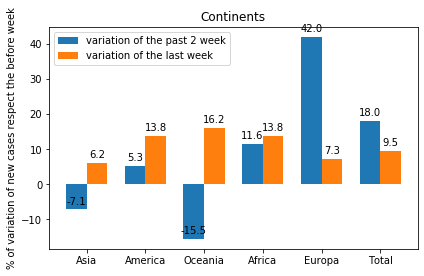

In [7]:
variation = variationofcases.index
varwe = (variationofcases["variation of the past week"].values)
varca =variationofcases["variation of the week"].values
 
#position of any tag in the axis X
x = np.arange(len(variation))

width = 0.35
 
fig, ax = plt.subplots()
 

rects1 = ax.bar(x - width/2, varwe, width, label='variation of the past 2 week')

rects2 = ax.bar(x + width/2, varca, width, label='variation of the last week')
 

ax.set_ylabel('% of variation of new cases respect the before week')
ax.set_title('Continents')
ax.set_xticks(x)
ax.set_xticklabels(variation)

ax.legend()
 
def autolabel(rects):
    """Funcion para agregar una etiqueta con el valor en cada barra"""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
 

autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.savefig('doble_barra.png')
#Mostramos la grafica con el metodo show()
plt.show()

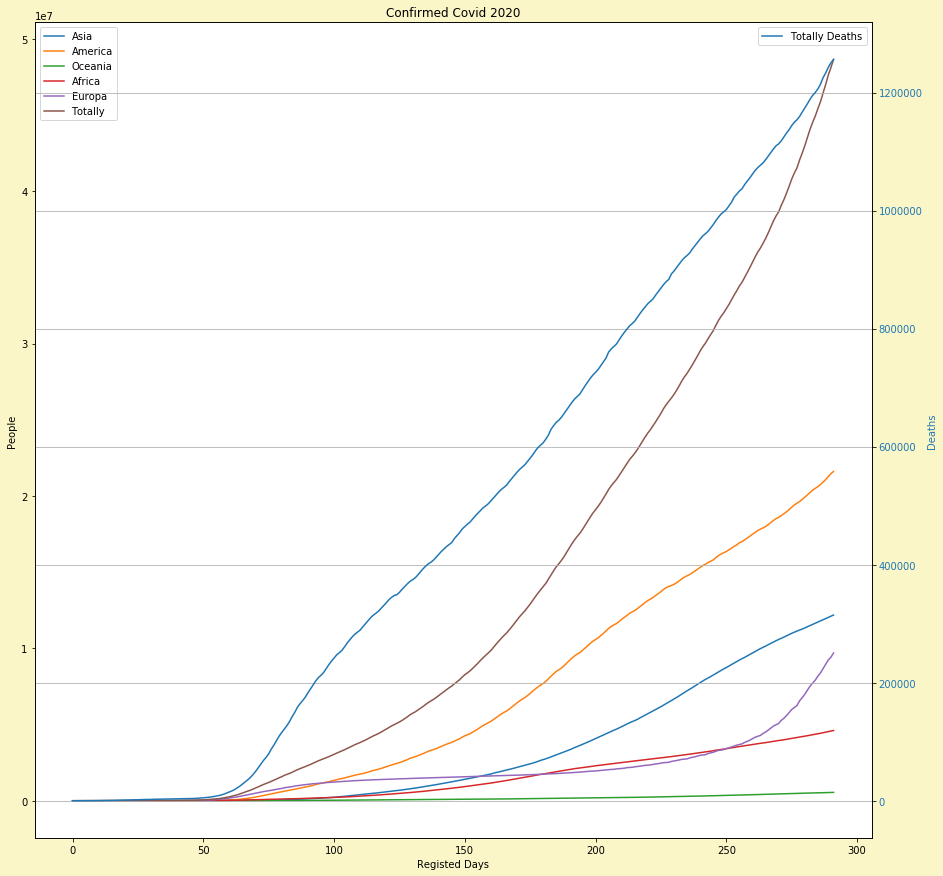

In [8]:
import matplotlib.pyplot as plt
confd=[k for k in range(len(confirmedcontinent.index))]
euc=[confirmedcontinent[k].values for k in confirmedcontinent.columns]
dfdead=[dfd.iloc[k].sum() for k in range(0,len(dfd))]

fig, ax = plt.subplots(figsize=(15,15),facecolor="#FAF6C7")  # Create a figure and an axes.
ax.plot(confd, euc[0], label='Asia')  # Plot some data on the axes.
ax.plot(confd, euc[1], label='America')  # Plot more data on the axes...
ax.plot(confd, euc[2], label='Oceania')
ax.plot(confd, euc[3], label='Africa')  # ... and some more.
ax.plot(confd, euc[4], label='Europa')  # ... and some more.
ax.plot(confd, euc[5], label='Totally')  # ... and some more.# ... and some more.
ax.set_xlabel('Registed Days')  # Add an x-label to the axes.
ax.set_ylabel('People')  # Add a y-label to the axes.
ax.set_title("Confirmed Covid 2020")  # Add a title to the axes.
ax2 = ax.twinx()
color = 'tab:blue'
ax2.set_ylabel('Deaths', color=color)  # we already handled the x-label with ax1
ax2.plot(confd, dfdead, color=color, label='Totally Deaths')
ax2.tick_params(axis='y', labelcolor=color)
plt.grid()
ax2.legend()
ax.legend()   #Add a legend.
plt.savefig("TimelinecovidGlobal.png", bbox_inches='tight')

In [11]:
#Global mortality
def mortalidadglobal():
    porcentajes=dfd/df*100
    porcentajes.fillna(0,inplace=True)


    m=(porcentajes.iloc[-1]*df.iloc[-1]).sum()
    m1=m/df.iloc[-1].sum()

    por=pd.DataFrame()





    print("The value of the average mortality with these levels of testing worldwide is {}".format(m1))
    return print("""mortality percentages according to countries and global average mortality"""), porcentajes,m1


mortalidadglobal()



The value of the average mortality with these levels of testing worldwide is 2.492650407932769
mortality percentages according to countries and global average mortality


(None,
          Afghanistan   Albania   Algeria   Andorra    Angola  \
 date                                                           
 1/22/20     0.000000  0.000000  0.000000  0.000000  0.000000   
 1/23/20     0.000000  0.000000  0.000000  0.000000  0.000000   
 1/24/20     0.000000  0.000000  0.000000  0.000000  0.000000   
 1/25/20     0.000000  0.000000  0.000000  0.000000  0.000000   
 1/26/20     0.000000  0.000000  0.000000  0.000000  0.000000   
 ...              ...       ...       ...       ...       ...   
 11/4/20     3.702109  2.403587  3.358140  1.486620  2.505714   
 11/5/20     3.705735  2.389860  3.342253  1.460565  2.470666   
 11/6/20     3.702204  2.365360  3.328947  1.460565  2.454389   
 11/7/20     3.701853  2.349715  3.316987  1.410039  2.456425   
 11/8/20     3.701416  2.309345  3.300511  1.393275  2.469235   
 
          Antigua and Barbuda  Argentina   Armenia  Australia   Austria  ...  \
 date                                                             

## We continue for the analisys in Europe 

In [10]:

#europeanalysis: (this analysis can be interpolated to any region you want as long as you have the rectangle of defined latitudes and longitudes = ce)
#confirmed

historiale1=[]
coordenadas=[]
paiseuropeos=[]

historiale1=(j["locations"][1]["history"])
europa = pd.DataFrame([[key, historiale1[key]] for key in historiale1.keys()], columns=['date', 'Albania'])
europa=europa.set_index("date")

ce=[36.662262,71.382695,-28.442636,26.401114]
for i in range(0,len(j["locations"])):
    if (float(j["locations"][i]["coordinates"]["lat"])>ce[0]) & (float(j["locations"][i]["coordinates"]["lat"])<ce[1]) &(float(j["locations"][i]["coordinates"]["long"])>ce[2]) & (float(j["locations"][i]["coordinates"]["long"])<ce[3]):
        coordenadas.append(j["locations"][i]["coordinates"])
        paiseuropeos.append(j["locations"][i]["country"])
        europa[j["locations"][i]["country"]]=[j["locations"][i]["history"][k] for k in j["locations"][i]["history"]]
europa.tail()

#Deaths

historiale1=[]
historiale1=(jdead["locations"][1]["history"])
europadead = pd.DataFrame([[key, historiale1[key]] for key in historiale1.keys()], columns=['date', 'Albania'])
europadead=europadead.set_index("date")

ce=[36.662262,71.382695,-28.442636,26.401114]
for i in range(0,len(jdead["locations"])):
    if (float(jdead["locations"][i]["coordinates"]["lat"])>ce[0]) & (float(jdead["locations"][i]["coordinates"]["lat"])<ce[1]) &(float(jdead["locations"][i]["coordinates"]["long"])>ce[2]) & (float(jdead["locations"][i]["coordinates"]["long"])<ce[3]):
        europadead[jdead["locations"][i]["country"]]=[jdead["locations"][i]["history"][k] for k in jdead["locations"][i]["history"]]
europadead.tail()
#Recovered


historiale1=[]
historiale1=(j["locations"][1]["history"])
europarecupe = pd.DataFrame([[key, historiale1[key]] for key in historiale1.keys()], columns=['date', 'Albania'])
europarecupe=europarecupe.set_index("date")

ce=[36.662262,71.382695,-28.442636,26.401114]
for i in range(0,len(jrecuperados["locations"])):
    if (float(jrecuperados["locations"][i]["coordinates"]["lat"])>ce[0]) & (float(jrecuperados["locations"][i]["coordinates"]["lat"])<ce[1]) &(float(jrecuperados["locations"][i]["coordinates"]["long"])>ce[2]) & (float(jrecuperados["locations"][i]["coordinates"]["long"])<ce[3]):
        europarecupe[jrecuperados["locations"][i]["country"]]=[jrecuperados["locations"][i]["history"][k] for k in jrecuperados["locations"][i]["history"]]






europadead

,Albania,Andorra,Austria,Belgium,Bosnia and Herzegovina,Bulgaria,Croatia,Czechia,Denmark,Estonia,...,Portugal,Romania,San Marino,Serbia,Slovakia,Slovenia,Spain,Sweden,Switzerland,United Kingdom
date,,,,,,,,,,,,,,,,,,,,,
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11/4/20,536,75,1227,12331,1358,1466,654,4133,729,73,...,2694,7419,42,850,261,441,38118,5997,2555,47742
11/5/20,543,75,1268,12520,1402,1518,683,4330,733,73,...,2740,7540,42,861,286,471,38486,6002,2628,48120
11/6/20,549,75,1340,12708,1457,1576,717,4484,738,73,...,2792,7663,42,871,317,497,38833,6022,2710,48475


In [ ]:
europarecupe

In [ ]:
europa

In [11]:
# Global analysis of Europe we are going to graph and model the system for Europe

historiale1=(j["locations"][1]["history"])
europaglobal = pd.DataFrame([[key, historiale1[key]] for key in historiale1.keys()], columns=['date', 'Albania'])
europaglobal=europaglobal.set_index("date")
x=[]
x1=[]
x2=[]
for i in range(0,len(jdead["locations"][1]["history"])):
    x.append(europarecupe.iloc[i].sum())
    x1.append(europa.iloc[i].sum())
    x2.append(europadead.iloc[i].sum())
europaglobal=europaglobal.reset_index()
y={"Recuperados Europa":x}
y1={"Pacientes activos (parte de estos pacientes estan recuperado pero no estan contabilizados)":x1}
y2={"Muertos Europa":x2}
europaglobal["TotalRecovered"]=pd.DataFrame(y)
europaglobal["TotalConfirmed"]=pd.DataFrame(y1)
europaglobal["TotalDeaths"]=pd.DataFrame(y2)
europaglobal=europaglobal.set_index("date")
europaglobal=europaglobal.drop("Albania", axis=1)

europaglobal.tail()
date=[key for key in historiale1.keys()]
date
import numpy as np
x1=list(np.array(x1) - np.array(x)-np.array(x2))
europaglobal.tail(20)


,TotalRecovered,TotalConfirmed,TotalDeaths
date,,,
9/20/20,1177761,3020655,191474
9/21/20,1183990,3100579,191867
9/22/20,1195967,3144059,192403
9/23/20,1204148,3180665,192799
9/24/20,1213152,3246882,193208
9/25/20,1224334,3304659,193698
9/26/20,1232151,3329619,193958
9/27/20,1237454,3352026,194108
9/28/20,1244575,3430110,194524


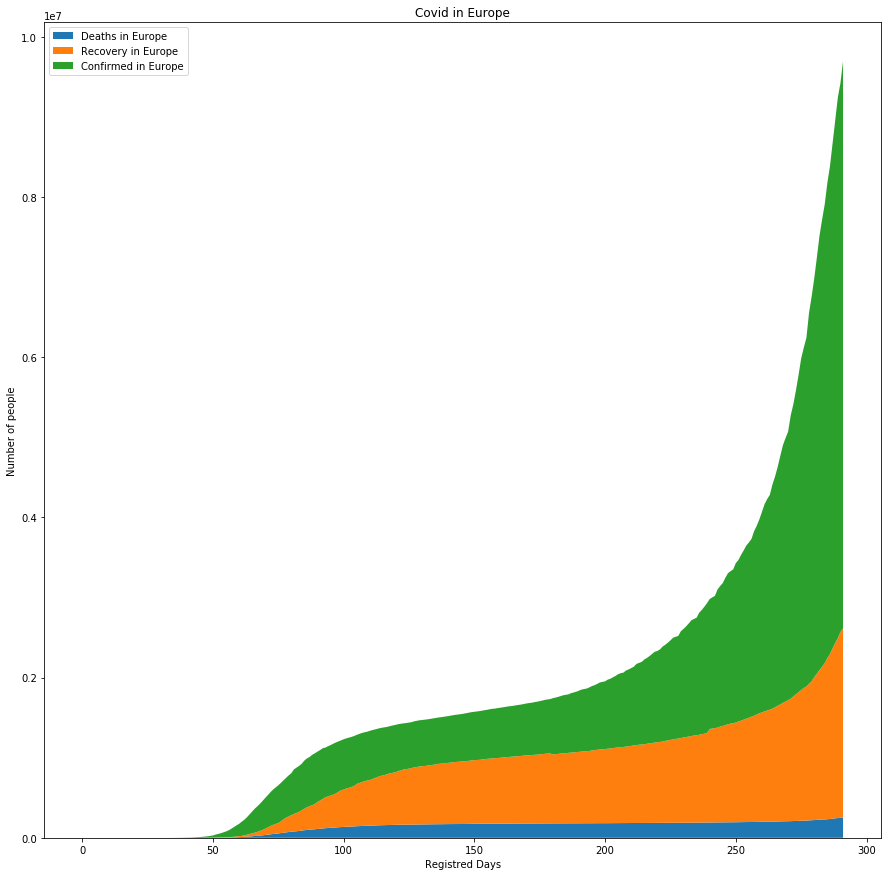

In [12]:
Dias=[f for f in range(0,len(date))]
population_by_continent = {
    "Deaths in Europe":x2,
    "Recovery in Europe":x,
    "Confirmed in Europe":x1,
    
}

fig, ax = plt.subplots(figsize=(15,15))
ax.stackplot(Dias, population_by_continent.values(),labels=population_by_continent.keys())

ax.legend(loc='upper left')
ax.set_title('Covid in Europe')
ax.set_xlabel('Registred Days')
ax.set_ylabel('Number of people')
ax.get_xticklabels(which="major")
plt.savefig("TimelinecovidEurope.jpg", bbox_inches='tight')
plt.show()


<Figure size 432x288 with 0 Axes>

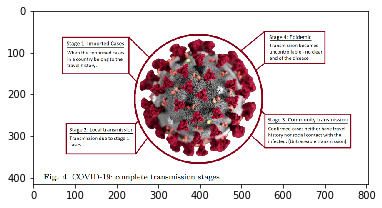

<Figure size 720x432 with 0 Axes>

In [14]:
#Prediction we are going to detect in the upper graph the 4 phases of the virus. 
# It is understood that there are two waves in Europe by the shape of the graph
img=plt.imread(r"C:\Users\patoPC\Desktop\proyect_data_analisis\covid.png")
plt.imshow(img)
plt.figure(figsize=(10,6))
plt.show()

## Confirm vs Dead in second wave covid-19


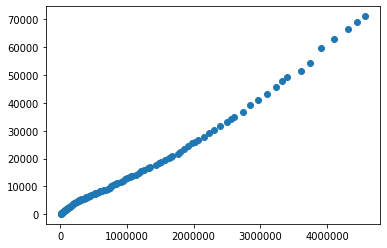

In [15]:
# With these graphs we can determine that seriously ill patients take an average of 14 days to die.
#Now we will determine the model that best fits now by machine learning we will determine its veracity

from sklearn import linear_model
X_p1=np.array([k-europaglobal["TotalConfirmed"][169]    for k in europaglobal["TotalConfirmed"][170:-14]])
y_p1=np.array([k - europaglobal["TotalDeaths"][183] for k in europaglobal["TotalDeaths"][184:]])
Diasx1=[f for f in range(170,len(date)-14)]
Diasy1=[f for f in range(184,len(date))]  

plt.scatter(X_p1,y_p1)
plt.savefig("ConfirmedvsDeaths.jpg", bbox_inches='tight')
plt.show()
X_p=X_p1[:,np.newaxis]
y_p=y_p1[:,np.newaxis]
Xp3=[]
yp3=[]
for i in range(0,len(Diasx1)):
    Xp3.append([Diasx1[i],X_p1[i]])
    yp3.append([Diasy1[i],y_p1[i]])





## Creation of the model and prediction of this

In [16]:

from sklearn.model_selection import train_test_split
#split the data of train  and test with a test size of 0.2 before i proved another values
#with help of below metrics to choose the best test size
X_train_p, X_test_p , y_train_p, y_test_p = train_test_split(X_p,y_p,test_size=0.20)
print(len(y_p1), len(Xp3))

108 108


In [17]:
from sklearn.preprocessing import PolynomialFeatures

poli_reg=PolynomialFeatures(degree=3)

In [18]:
#Transform to existing characteristics in higher grade characteristics


X_train_poli =poli_reg.fit_transform(X_train_p)
X_test_poli= poli_reg.fit_transform(X_test_p)

In [19]:
pr= linear_model.LinearRegression()

In [20]:
#Train the model
pr.fit(X_train_poli, y_train_p)
#Realize a prediction
Y_pred_pr=pr.predict(X_test_poli)

<function matplotlib.pyplot.show(*args, **kw)>

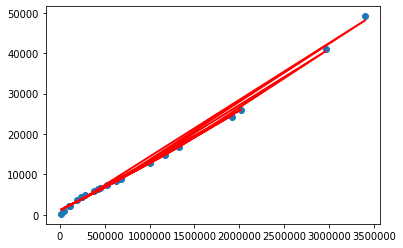

In [21]:
# We graph the data together with the model
plt.scatter(X_test_p,y_test_p)
plt.plot(X_test_p,Y_pred_pr,color="red",linewidth=2)
plt.savefig("ModelConfirmedvsDeaths.jpg", bbox_inches='tight')
plt.show

In [22]:
from sklearn import metrics as ms
print()
print("Data of the model polinomial regresion")
print()
print("Value of coeficience a")
print(pr.coef_)
print("Value of intersection b")
print(pr.intercept_)
print("precition of the model")
print(pr.score(X_train_poli,y_train_p))
#choose degree 3 beacause degree 4 and five
ms.mean_squared_error(y_test_p, Y_pred_pr, sample_weight=None, multioutput='uniform_average', squared=True).round(0)


Datos del modelo de regresion polinomial

Value of coeficience a
[[0.00000000e+00 1.11494504e-02 3.10201615e-10 1.40512602e-16]]
Value of intersection b
[1132.67557571]
precition of the model
0.9992339101202918


241500.0

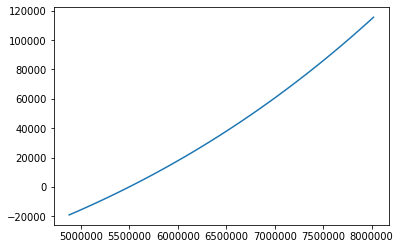

In [23]:
confsa=np.linspace(confirmedcontinent["Europa"][-14]-confirmedcontinent["Europa"][170],confirmedcontinent["Europa"][-1]-confirmedcontinent["Europa"][170],100)
gf=(989.91495524 +1.20179868e-02*confsa-3.82819980e-10*confsa**2+ 2.81025203e-16*confsa**3)-(europaglobal["TotalDeaths"][-1]-europaglobal["TotalDeaths"][-184])            
plt.plot(confsa,gf)


In [24]:
(europaglobal["TotalDeaths"][-1]-europaglobal["TotalDeaths"][183])

71040

## Correlation between indicators of covid 19 in Europe

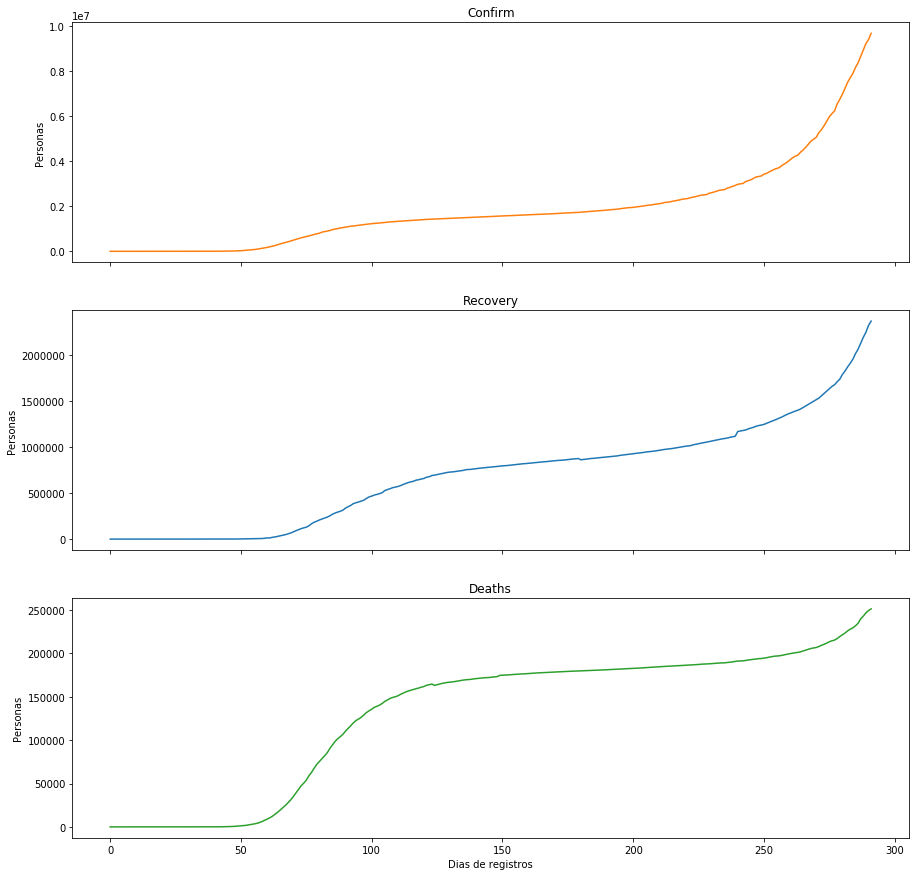

In [26]:

x3=list(np.array(x1) + np.array(x) + np.array(x2))
fig, axs = plt.subplots(3,figsize=(15,15))
axs[1].plot(Dias, x)
axs[1].set_title('Recovery')
axs[0].plot(Dias, x3, 'tab:orange')
axs[0].set_title('Confirm')
axs[2].plot(Dias, x2, 'tab:green')
axs[2].set_title('Deaths')
plt.savefig("ConfirmRecovetryDeath.jpg", bbox_inches='tight')
for ax in axs.flat:
    ax.set(xlabel='Dias de registros', ylabel='Personas')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


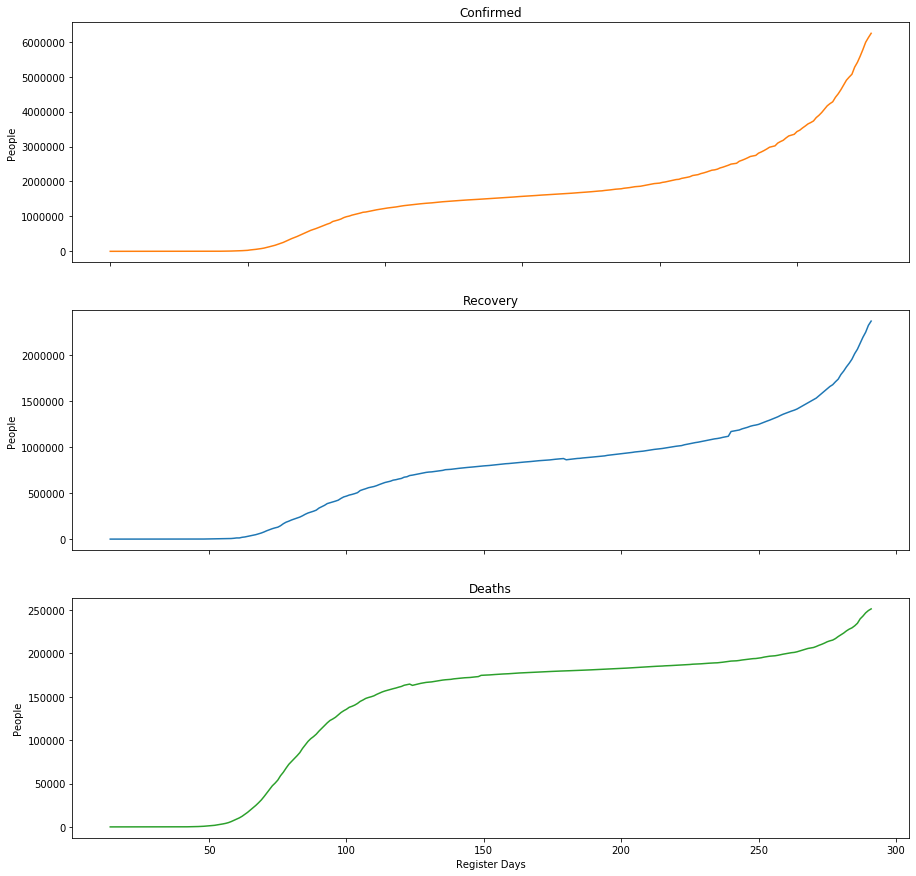

In [27]:

x3=list(np.array(x1) + np.array(x) + np.array(x2))
fig, axs = plt.subplots(3,figsize=(15,15))
axs[1].plot(Dias[14:], x[14:])
axs[1].set_title('Recovery')
axs[0].plot(Dias[:-14], x3[:-14], 'tab:orange')
axs[0].set_title('Confirmed')
axs[2].plot(Dias[14:], x2[14:], 'tab:green')
axs[2].set_title('Deaths')
plt.savefig("ConfirmRecovetryDeathdesfac.jpg", bbox_inches='tight')
for ax in axs.flat:
    ax.set(xlabel='Register Days', ylabel='People')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()



3358  Romania is the country who in the 18/09/2020 report all of his recuperated people
AxesSubplot(0.125,0.125;0.62x0.755)


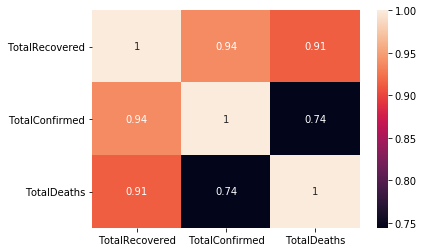

In [28]:
print((europarecupe.iloc[-45]-europarecupe.iloc[-46]).max()," Romania is the country who in the 18/09/2020 report all of his recuperated people")

#Correlation between variables, we clean the data of anomalous data.
import seaborn as sns
euro=pd.DataFrame({"death":x2[14:],"recovery":x[14:],"confirms":x3[:-14]})
euro.tail()
df_corr=europaglobal[["TotalRecovered","TotalConfirmed","TotalDeaths"]]
pearsoncorrelation=sns.heatmap(df_corr.corr(),annot=True)

print(pearsoncorrelation)


AxesSubplot(0.125,0.125;0.62x0.755)


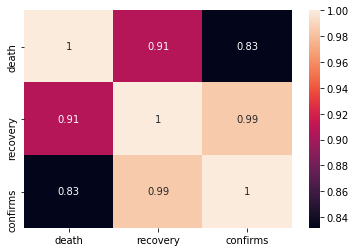

In [29]:
pearsoncorrelation14=sns.heatmap(euro.corr(),annot=True)
print(pearsoncorrelation14)


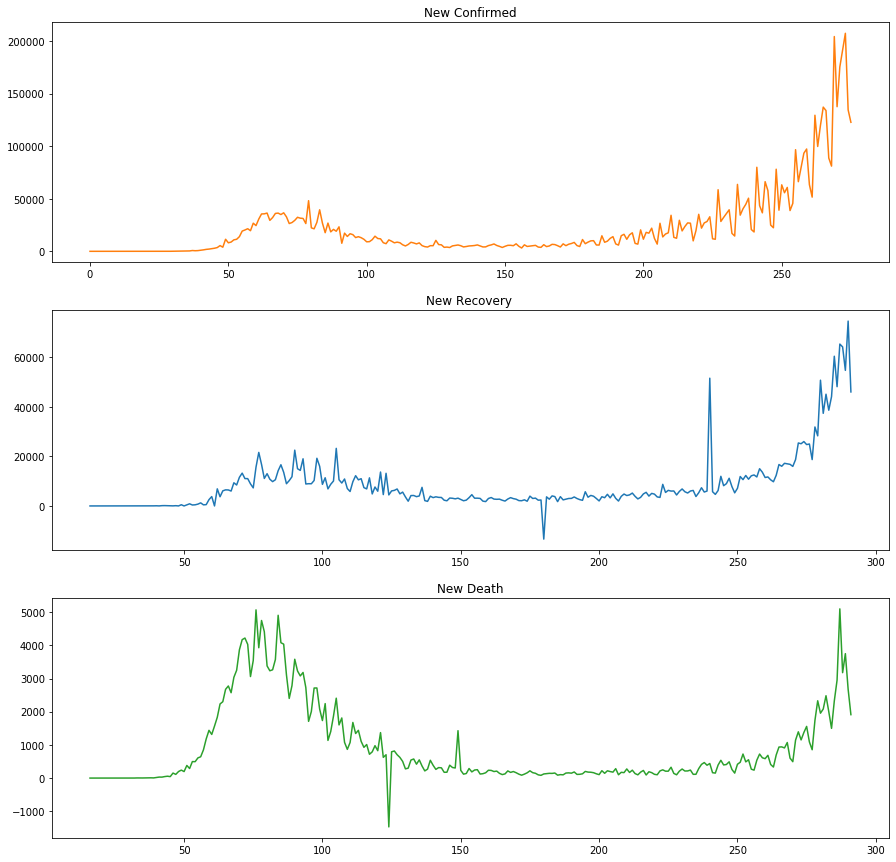

In [30]:
#As it can be determined in the graphs below, it can be seen that the recovered and dead take approximately 14 days to reach the confirmed ones, we can verify this
#Observing the growth rate graph
x1speedrecovery=[(x[i]-x[i-1])/(Dias[i]-Dias[i-1]) for i in range(2,len(x)) ]
x2speeddead=[(x2[i]-x2[i-1])/(Dias[i]-Dias[i-1]) for i in range(2,len(x2)) ]
x3speedconfirmed=[(x3[i]-x3[i-1])/(Dias[i]-Dias[i-1]) for i in range(2,len(x3)) ]

fig, axs1 = plt.subplots(3,figsize=(15,15))
axs1[1].plot(Dias[16:], x1speedrecovery[14:])
axs1[1].set_title('New Recovery ')
axs1[0].plot(Dias[:-16], x3speedconfirmed[:-14], 'tab:orange')
axs1[0].set_title('New Confirmed')
axs1[2].plot(Dias[16:], x2speeddead[14:], 'tab:green')
axs1[2].set_title('New Death')
plt.savefig("ConfirmRecovetryDeathNewforDay.jpg", bbox_inches='tight')

As can be seen, our premise that the dead and recovered reach those confirmed within 14 days can be confirmed.
The peak of 50,000 recovered tends to mean that data has been loaded from a country that until that moment had not confirmed recovered.
To include in the statistical analysis of the person, he concluded that choosing 14 days gives us a much better correlation for the values.

# Second wave analysis and peak confirm and death prediction.


to know when start the second wave we simply do the derivative where the growth rate of contagions begins to grow, we have the beginning of the second wave (previous graph point red): the calculations for that are in the graph above.

In this part, what we are going to do is analyze, based on the days, how the contagion curve is going to grow, but as seen in the graph we have two sections: the first wave that develops from day 0 to day 155, and the second wave What is from day 170 

We are going to separated the second wave for the graph and predict his behavior to the next 2 weeks. The actual day is 11/04/2020


        

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


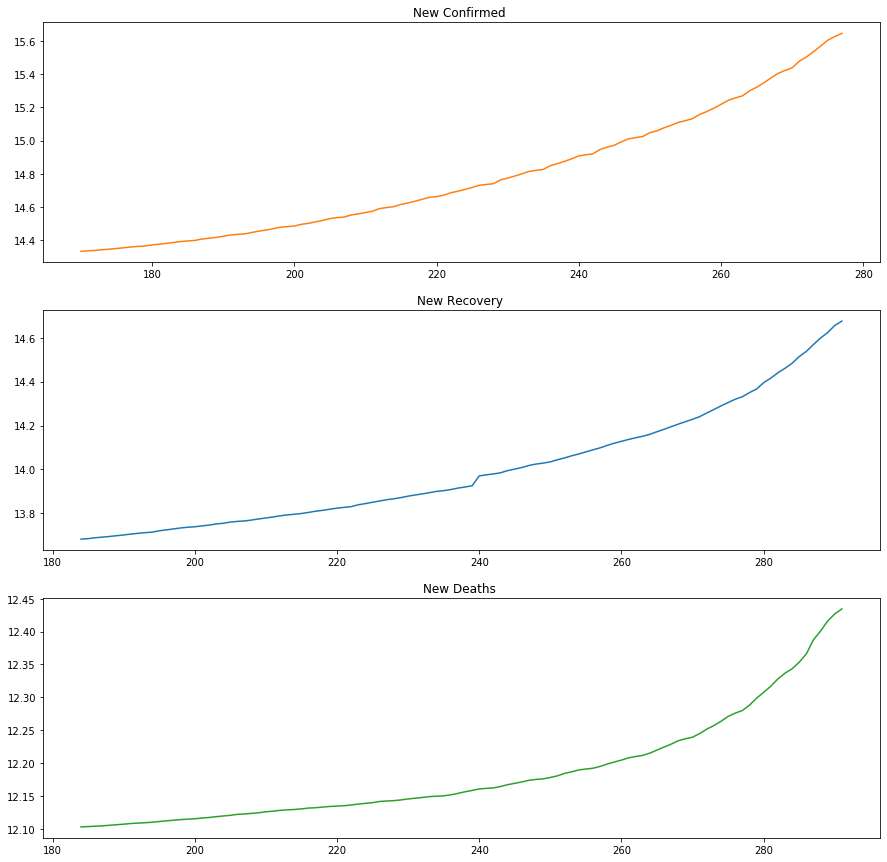

In [31]:
#With this premise, what we will do is predict the amount of contafions and deaths that will occur in 14 days, which will be its value
#start.
# first we linearize the values of the exponential function, and then with linear regression techniques in machine learning predict its curve
xlogrec, xlogdead, xlogconfirm=[],[],[]
for i in range (0,len(x)):
    xlogrec.append(np.log(x[i]))
    xlogdead.append(np.log(x2[i]))
    xlogconfirm.append(np.log(x3[i]))

fig, axs2 = plt.subplots(3,figsize=(15,15))
axs2[1].plot(Dias[184:], xlogrec[184:])
axs2[1].set_title('New Recovery ')
axs2[0].plot(Dias[170:-14], xlogconfirm[170:-14], 'tab:orange')
axs2[0].set_title('New Confirmed ')
axs2[2].plot(Dias[184:], xlogdead[184:], 'tab:green')
axs2[2].set_title('New Deaths ')
plt.savefig("logsecondwave.jpg", bbox_inches='tight')


#### as seen in the upper graph Europe faces a second wave with exponential growth, the first 30 days of this period exponential growth was constant, now in the last few days it is already at higher levels. This means that these last days of the second wave the growth was accelerating with respect to that seen in the first part of the second wave, With this growth if it continues like this for the next 14 days, the amount of new infections can be estimated and there will be dead in 14 days, we are going to evaluate this premise.

## Prediction for the next days in the infected and deaths

<function matplotlib.pyplot.show(*args, **kw)>

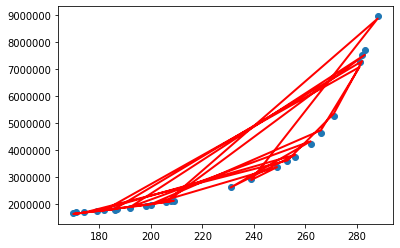

In [32]:
DiasWave2=np.array(Dias[170:-1])
DiasWave2=DiasWave2[:,np.newaxis]
xlogconfirmWave2=np.array(xlogconfirm[170:-1])
xlogconfirmWave2=xlogconfirmWave2[:,np.newaxis]




X_train_pconfirm, X_test_pconfirm,  y_train_pconfirm, y_test_pconfirm, = train_test_split(DiasWave2,xlogconfirmWave2,test_size=0.2)
poli_reg=PolynomialFeatures(degree=3)
X_train_poli =poli_reg.fit_transform(X_train_pconfirm)
X_test_poli= poli_reg.fit_transform(X_test_pconfirm)
#Entreno el modelo
pr.fit(X_train_poli, y_train_pconfirm)
#realizo una prediccion
Y_pred_pr=pr.predict(X_test_poli)
#hecho esto el dia 29 tenemos que ver en las noticias y en el modelo a cuantas muertes vamos a llegar en 14 dias.
#Graficamos los datos junto con el modelo
plt.scatter(X_test_pconfirm,np.exp(y_test_pconfirm))
plt.plot(X_test_pconfirm,np.exp(Y_pred_pr),color="red",linewidth=2)
plt.savefig("predlogsecondwave.jpg", bbox_inches='tight')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

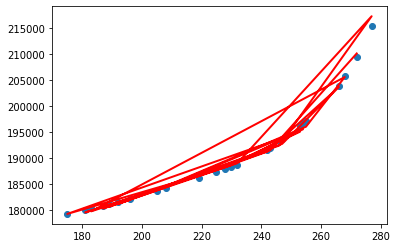

In [33]:
DiasWave2=np.array(Dias[170:-1])
DiasWave2=DiasWave2[:,np.newaxis]
xlogdeadWave2=np.array(xlogdead[170:-1])
xlogdeadWave2=xlogdeadWave2[:,np.newaxis]




X_train_pdead, X_test_pdead,  y_train_pdead, y_test_pdead, = train_test_split(DiasWave2,xlogdeadWave2,test_size=0.2)
poli_reg=PolynomialFeatures(degree=4)
X_train_poli =poli_reg.fit_transform(X_train_pdead)
X_test_poli= poli_reg.fit_transform(X_test_pdead)
#Entreno el modelo
pr.fit(X_train_poli, y_train_pdead)
#realizo una prediccion
Y_pred_pr=pr.predict(X_test_poli)
#hecho esto el dia 29 tenemos que ver en las noticias y en el modelo a cuantas muertes vamos a llegar en 14 dias.
#Graficamos los datos junto con el modelo
plt.scatter(X_test_pdead,np.exp(y_test_pdead))
plt.plot(X_test_pdead,np.exp(Y_pred_pr),color="red",linewidth=2)
plt.savefig("predlogsecondwavedead.jpg", bbox_inches='tight')
plt.show

In [34]:
print()
print("Data for the model of polinomial regresion")
print()
print("value of coeficient a")
print(pr.coef_[0])
print("value of interception" )
print(pr.intercept_[0])
print("Model Precision")
print(pr.score(X_train_poli,y_train_pdead))
print("Mean Square Error")
print(ms.mean_squared_error(y_test_pdead, Y_pred_pr, sample_weight=None, multioutput='uniform_average', squared=True))


Data for the model of polinomial regresion

value of coeficient a
[ 0.00000000e+00 -2.62220489e-01  1.86434633e-03 -5.84924478e-06
  6.86057916e-09]
value of interception
25.803188526171617
Model Precision
0.9982403776253531
Mean Square Error
1.2220793240395585e-05


array([53410.93762479])

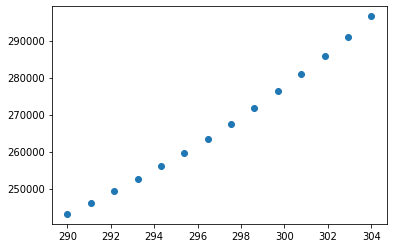

In [35]:
Diaswa2=np.linspace(DiasWave2[-1],DiasWave2[-1]+14,14)
dead=np.exp(21.85408841106984-1.89184580e-01*Diaswa2+1.36233896e-03*Diaswa2**2+-4.32941660e-06*Diaswa2**3+5.15048310e-09*Diaswa2**4)
ax6=plt.scatter(Diaswa2,dead)
dead[-1]-dead[0]

In [36]:
21.85408841106984-1.89184580e-01*Diaswa2+1.36233896e-03*Diaswa2**2+-4.32941660e-06*Diaswa2**3+5.15048310e-09*Diaswa2**4


array([[12.40151366],
       [12.41371769],
       [12.4263857 ],
       [12.43953029],
       [12.45316419],
       [12.46730031],
       [12.48195173],
       [12.4971317 ],
       [12.51285362],
       [12.52913107],
       [12.54597778],
       [12.56340768],
       [12.58143483],
       [12.60007347]])

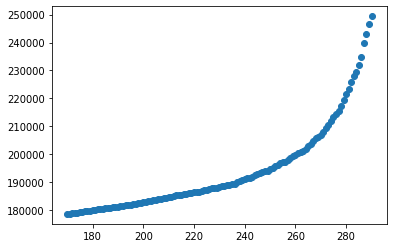

In [37]:
ax5=plt.scatter(DiasWave2,np.exp(xlogdeadWave2))

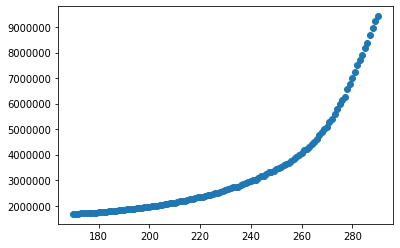

In [38]:

ax4=plt.scatter(DiasWave2,np.exp(xlogconfirmWave2))


In [39]:
print()
print("Data for the model of polinomial regresion")
print()
print("value of coeficient a")
print(pr.coef_[0])
print("value of interception" )
print(pr.intercept_[0])
print("Model Precision")
print(pr.score(X_train_poli,y_train_pconfirm))
print("Mean Square Error")
print(ms.mean_squared_error(y_test_pconfirm, Y_pred_pr, sample_weight=None, multioutput='uniform_average', squared=True))


Data for the model of polinomial regresion

value of coeficient a
[ 0.00000000e+00 -2.62220489e-01  1.86434633e-03 -5.84924478e-06
  6.86057916e-09]
value of interception
25.803188526171617
Model Precision
-33.67498107934822
Mean Square Error
7.761372115832089


In [40]:
y=np.exp(pr.intercept_[0] +1.00910618e-01*Dias[-1]+ -5.06494321e-04*Dias[-1]**2 + 9.04573811e-07*Dias[-1]**3)
y
realError=abs((y-europaglobal["TotalConfirmed"][-1])/(y-np.exp(xlogconfirm[0])))*100
print("its seen the value predicter for the day {} is: {} vs the real value: {}".format(date[-1],y.round(0),europaglobal["TotalConfirmed"][-1]))
print("error for this estimation: the error in this prediction was {}%, with this model we can predict in the short time with a low level of error".format(realError.round(2)))

its seen the value predicter for the day 11/8/20 is: 1030061908158550.0 vs the real value: 9696925
error for this estimation: the error in this prediction was 100.0%, with this model we can predict in the short time with a low level of error


This means that not only is the virus not slowing down, but it is accelerating exponentially and as a result of the data of the last days it is seen other factors are taking place. So that the number of confirmed by the virus increases (More tests in The population, as it is now happening that they are being tested asymptomatic, this means a lower degree of mortality since the pattern of this second wave would be changing) the virus in Europe in the last days and the shape of the graph is changing, with This value of confirmed and understanding that the deaths and recovered occur within 14 days, a number of deaths can be estimated in the next 14 days. With these calculations we will proceed to calculate them.


In [41]:
dead=(x2[-1]-x2[184])/(europaglobal["TotalConfirmed"][-14]-x3[170])*(europaglobal["TotalConfirmed"][-1]-europaglobal["TotalConfirmed"][-14])
newconfirmated=np.exp(7.9642435 + 9.29651889e-02*(Dias[-1]+14) -4.73081342e-04*(Dias[-1]+14)**2 +8.58139503e-07*(Dias[-1]+14)**3)-y
print("If this pattern continues in the next 2 weeks we will have in the UE {} dead people and {} new confirmated in just 2 weeks, this prediction was made on {}".format(int(dead),int(newconfirmated),date[-1]))

If this pattern continues in the next 2 weeks we will have in the UE 45657 dead people and -1030061891001759 new confirmated in just 2 weeks, this prediction was made on 11/8/20


## Analysis of the variables mean age and obesity to try to find a correlation with the mortality of the covid

40


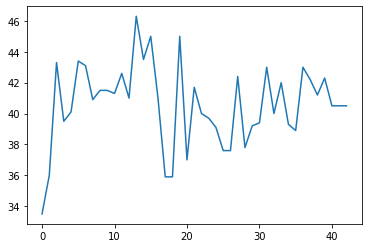

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import requests
urlultimo="https://covid-tracker-us.herokuapp.com/v2/locations?source=jhu&timelines=false"
resultimo=requests.get(urlultimo)
jultimo=resultimo.json()
mediageeurope="""33.5
36
43.3
39.5
40.10
43.4
43.1
40.9
41.5
41.5
41.3
42.6
41
46.3
43.5
45
41
35.90
35.90
45.00
37
41.7
40
39.70
39.10
37.6
37.60
42.4
37.80
39.20
39.40
43.00
40.00
42
39.30
38.90
43.00
42.20
41.20
42.30
40.50
40.50
40.50"""
#the data of the media age was extracted for the data bank and acomodated with an excel data sheet.
obesity=[21.7,25.6,20.1,22.1,17.9,25,24.4,26,19.7,21.2,22.2,21.6,22.3,24.9,19.8,26.4,21.9,27.8,19.9,21.0,23.6,26.3,22.6,23.6,19.9,23.3,20.4,24.9,23.1,23.1,20.8,22.5,19.9,21.5,20.5,20.2,23.8,20.6,19.5,27.8]
print(len (obesity))
h1=mediageeurope.split("\n")
h1=np.array([float(i) for i in h1])
meanmediage=np.mean(h1)
stdmediage=np.std(h1)
h12=[x for x in range(0,len(h1))]
plt.plot(h12,h1)


In [69]:

ce=[36.662262,71.382695,-28.442636,26.401114]
jultimo
death,confirmed,recovery,population ,country = [] ,[],[] ,[] ,[]

for i in range(0,len(jultimo["locations"])):
    if (float(jultimo["locations"][i]["coordinates"]["latitude"])>ce[0]) & (float(jultimo["locations"][i]["coordinates"]["latitude"])<ce[1]) &(float(jultimo["locations"][i]["coordinates"]["longitude"])>ce[2]) & (float(jultimo["locations"][i]["coordinates"]["longitude"])<ce[3]):
        country.append(jultimo["locations"][i]["country"])
        confirmed.append(europa.iloc[-14][jultimo["locations"][i]["country"]])
        death.append(jultimo["locations"][i]["latest"]["deaths"])
        recovery.append(europarecupe.iloc[-1][jultimo["locations"][i]["country"]])
        population.append(jultimo["locations"][i]["country_population"])
Europedf=pd.DataFrame({"Country":country,"confirmed":confirmed,"death":death,"recovery":recovery,"population":population,"mediage":h1})
Europedf=Europedf.drop([41,40,8])

Europedf["%mortality"]=Europedf["death"]/Europedf["confirmed"]*100
Europedf["cases/thousand"]=Europedf["confirmed"]/Europedf["population"]*1000
Europedf["death/thousand"]=Europedf["death"]/Europedf["population"]*1000

Europedf=Europedf.set_index("Country")
Europedf
obesity=pd.DataFrame(obesity,Europedf.index)
Europedf["Obesity"]=obesity
Europedf.head()


,confirmed,death,recovery,population,mediage,%mortality,cases/thousand,death/thousand,Obesity
Country,,,,,,,,,
Albania,19445,559,12092,2866376,33.5,2.874775,6.783827,0.195020,21.7
Andorra,4325,75,4248,77006,36.0,1.734104,56.164455,0.973950,25.6
Austria,83267,1411,91719,8847037,43.3,1.694549,9.411852,0.159488,20.1
Belgium,333718,13055,29651,11422068,39.5,3.911986,29.216951,1.142963,22.1
Bosnia and Herzegovina,41596,1510,30939,3323929,40.1,3.630157,12.514106,0.454282,17.9


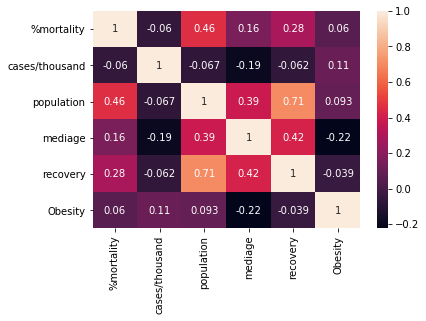

In [44]:
import seaborn as sns
Europedf1=Europedf[["%mortality","cases/thousand","population","mediage","recovery","Obesity"]]
EuropedfPerson=sns.heatmap(Europedf1.corr(),annot=True)

Text(0.5, 1, 'Regression plot for likes vs views')

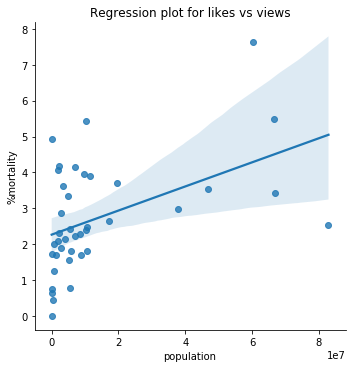

In [45]:
# As you can see, any of these variables has correlations with mortality, the only variable that has good correlations is in recovery vs population
# and % mortality vs population, this means that a high population in the country increases mortality.
#this dtaframe use confirmed in the 14 dias before that the actually date.
#But another indicators how as mediage and obesity dont have relations.


In [46]:
Europedf["recovery/thousand"]=Europedf["recovery"]/Europedf["population"]*1000

In [65]:
#Europedfanalisis=Europedf["recovery/thousand"],Europedf["death/thousand"],Europedf["cases/thousand"],Europedf["Obesity"],Europedf["mediage"])
Europedf["obesity*mediaage"]=Europedf["mediage"]*Europedf["Obesity"]
Europedf["obesity^2"]=Europedf["Obesity"]*Europedf["Obesity"]
Europedf["mediage^2"]=Europedf["mediage"]*Europedf["mediage"]

Europedfanalisis=Europedf.loc[:,["death/thousand","cases/thousand","%mortality","obesity*mediaage","obesity^2","mediage^2"]]

In [66]:
Europedfanalisis

,death/thousand,cases/thousand,%mortality,obesity*mediaage,obesity^2,mediage^2
Country,,,,,,
Albania,0.195020,6.783827,2.874775,726.95,470.89,1122.25
Andorra,0.973950,56.164455,1.734104,921.60,655.36,1296.00
Austria,0.159488,9.411852,1.694549,870.33,404.01,1874.89
Belgium,1.142963,29.216951,3.911986,872.95,488.41,1560.25
Bosnia and Herzegovina,0.454282,12.514106,3.630157,717.79,320.41,1608.01
Bulgaria,0.237856,5.733111,4.148809,1085.00,625.00,1883.56
Croatia,0.194161,9.098645,2.133950,1051.64,595.36,1857.61
Czechia,0.457194,25.256701,1.810187,1063.40,676.00,1672.81
Denmark,0.128160,7.143145,1.794166,817.55,388.09,1722.25


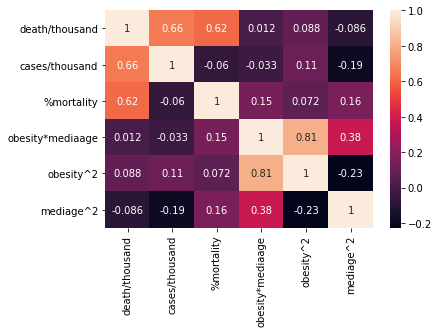

In [67]:
sns.heatmap(Europedfanalisis.corr(),annot=True)

##  Conclusion:
### The values that we obtain when carrying out the Pearson correlations between the obesity and mean age variables are not close to 1 or -1, this means that these variables do not influence the % fatality, number of deaths or confirmed by country, neither in a linear nor in a quadratic or combined form.

In [50]:
#Another study will not prosperated because I didnt encounter a patern who relations obesity and mediage with covid indicators.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression 
poly = PolynomialFeatures(3)
pato=[k for k in Europedf["mediage"].values]
pato1=[k for k in Europedf["death/thousand"].values]
pato2=[k for k in Europedf["cases/thousand"].values]
pato3=[k for k in Europedf["Obesity"].values]
pene=np.array([pato,pato1,pato2,pato3]).T
anal=[Europedf["mediage"].values,Europedf["death/thousand"].values,Europedf["cases/thousand"].values,Europedf["Obesity"].values]
yanal=Europedf["%mortality"].values
anal=poly.fit_transform(pene)
len(yanal)

40

In [51]:
regresion_linear = LinearRegression()
regresion_linear.fit(pene, yanal)
print('w = ' + str(regresion_linear.coef_) + ', b = ' + str(regresion_linear.intercept_))

w = [ 0.06445901  5.68131865 -0.11967066  0.0528216 ], b = -1.4873004555534415
